In [51]:
#import h5py
import pickle
import time
import numpy as np
#import pandas as pd
#import wavelets as wl
#from scipy import signal
from matplotlib import pyplot as plt

#### Loading spikes

In [2]:
npys_dir = '/home/maspe/filer/SERT/ALL/npys/'
IDs_WT = ['SERT1597', 'SERT1659'] #, 'SERT1678', 'SERT1908', 'SERT1984', 'SERT1985', 'SERT2014']

In [5]:
all_mice_WT = {}

for ID in IDs_WT:
    print('Importing {}...'.format(ID))
    clock = time.time()
    all_mice_WT[ID] = np.load(npys_dir + ID + '_spikes_WT.npy', allow_pickle=True)

    print('{} imported in {} min.'.format(ID, (time.time() - clock) / 60))

Importing SERT1597...
SERT1597 imported in 4.12520893017 min.
Importing SERT1659...
SERT1659 imported in 9.28218188286 min.


In [48]:
data = all_mice_WT['SERT1659']
sample_rate = 30000
data.shape

(66, 21150000)

In [49]:
t=np.add.reduceat(data, range(0, data.shape[1], sample_rate), axis=1)
t.shape

(66, 705)

11.75

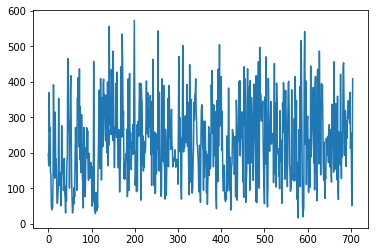

In [52]:
plt.plot(t[0,:])

In [ ]:
### Extract a windows of n_secs length at the beginning and end of the task
n_min = 2
sample_rate = 30000
start_task = n_min * 60 * sample_rate

#window = int(sampleRate * secs)
n_points = 30000 * 60 * 10 # Length of the OF
window = sample_rate * n_min * 60 # 2 min windows
exclude_window = sample_rate * exclude_sec # 15 sec windows to exclude at the HC-OF transition

In [10]:
with open('/home/maspe/filer/SERT/ALL/npys/channels_by_spikes_WT.info', 'rb') as f:
    all_channels_WT = pickle.load(f)

In [12]:
all_channels_WT.keys()

['SERT1984',
 'SERT1985',
 'SERT1659',
 'SERT1678',
 'SERT1908',
 'SERT1597',
 'SERT2014']

In [14]:
mPFC_WT = {}
NAC_WT  = {}
BLA_WT  = {}
vHip_WT = {}

for mouse in all_mice_WT.keys():
    mPFC_WT_indexes  = [i for i,x in enumerate(all_channels_WT[mouse]) if x == 'mPFC_left']
    NAC_WT_indexes = [i for i,x in enumerate(all_channels_WT[mouse]) if x == 'NAC_left']
    BLA_WT_indexes  = [i for i,x in enumerate(all_channels_WT[mouse]) if x == 'BLA_left']
    vHip_WT_indexes  = [i for i,x in enumerate(all_channels_WT[mouse]) if x == 'vHipp_left']
    


In [18]:
len(BLA_WT_indexes)

18

In [ ]:
    
    mPFC_WT[mouse] = np.sum(all_mice_WT[mouse][mPFC_WT_indexes, :], axis=0)
    NAC_WT[mouse] = np.sum(all_mice_WT[mouse][NAC_WT_indexes, :], axis=0)
    BLA_WT[mouse] = np.sum(all_mice_WT[mouse][BLA_WT_indexes, :], axis=0)
    vHip_WT[mouse] = np.sum(all_mice_WT[mouse][vHip_WT_indexes, :], axis=0)

In [ ]:
npys_dir = '/home/maspe/filer/SERT/ALL/npys/'

all_spikes_WT = {'mPFC': mPFC_WT, 'BLA': BLA_WT, 'NAC': NAC_WT, 'vHip': vHip_WT}
np.save('/home/maspe/filer/SERT/ALL/npys/all_spikes_WT', all_spikes_WT)

In [ ]:
all_channels_KO[mouse]

In [ ]:
npys_dir = '/home/maspe/filer/SERT/ALL/npys/'
all_mice_KO = {'SERT1665': np.load(npys_dir + 'SERT1665_perispikes_KO.npy', allow_pickle=True), 
               'SERT1668': np.load(npys_dir + 'SERT1668_perispikes_KO.npy', allow_pickle=True),
              'SERT2013': np.load(npys_dir + 'SERT2013_perispikes_KO.npy', allow_pickle=True),
              'SERT2018': np.load(npys_dir + 'SERT2018_perispikes_KO.npy', allow_pickle=True),
              'SERT2024': np.load(npys_dir + 'SERT2024_perispikes_KO.npy', allow_pickle=True)}
print('Perispikes loaded!\nAdding spikes...')



In [ ]:
mPFC_KO = {}
NAC_KO  = {}
BLA_KO  = {}
vHip_KO = {}

for mouse in all_mice_KO.keys():
    mPFC_KO_indexes  = [i for i,x in enumerate(all_channels_KO[mouse]) if x == 'mPFC_left']
    NAC_KO_indexes = [i for i,x in enumerate(all_channels_KO[mouse]) if x == 'NAC_left']
    BLA_KO_indexes  = [i for i,x in enumerate(all_channels_KO[mouse]) if x == 'BLA_left']
    vHip_KO_indexes  = [i for i,x in enumerate(all_channels_KO[mouse]) if x == 'vHipp_left']
    
    
    mPFC_KO[mouse] = np.sum(all_mice_KO[mouse][mPFC_KO_indexes, :], axis=0)
    NAC_KO[mouse] = np.sum(all_mice_KO[mouse][NAC_KO_indexes, :], axis=0)
    BLA_KO[mouse] = np.sum(all_mice_KO[mouse][BLA_KO_indexes, :], axis=0)
    vHip_KO[mouse] = np.sum(all_mice_KO[mouse][vHip_KO_indexes, :], axis=0)

In [ ]:
all_spikes_KO = {'mPFC': mPFC_KO, 'BLA': BLA_KO, 'NAC': NAC_KO, 'vHip': vHip_KO}
np.save('/home/maspe/filer/SERT/ALL/npys/all_spikes_KO', all_spikes_KO)

In [ ]:
npys_dir

#######################

In [ ]:
all_spikes_WT = np.load('/home/maspe/filer/SERT/ALL/npys/all_spikes_WT.npy', allow_pickle=True).item()
all_spikes_WT.keys()

In [ ]:
all_spikes_KO = np.load('/home/maspe/filer/SERT/ALL/npys/all_spikes_KO.npy', allow_pickle=True).item()
all_spikes_KO.keys()

In [ ]:
tmean_WT.shape[0]/2

In [ ]:
factor = 15000
structure = 'vHip'

iteration = 0
t = np.zeros((len(all_spikes_WT[structure].keys()), 7200000 / factor))
for mouse in all_spikes_WT[structure].keys():
    t[iteration,:]=np.add.reduceat(all_spikes_WT[structure][mouse],
                                   range(0, all_spikes_WT[structure][mouse].shape[0], factor))
    
    iteration += 1
    
tmean_WT=np.mean(t, axis=0)
tsem_WT=np.std(t, axis=0) / np.sqrt(t.shape[0])

iteration = 0
t = np.zeros((len(all_spikes_KO[structure].keys()), 7200000 / factor))
for mouse in all_spikes_KO[structure].keys():
    t[iteration,:]=np.add.reduceat(all_spikes_KO[structure][mouse],
                                   range(0, all_spikes_KO[structure][mouse].shape[0], factor))
    
    iteration += 1
    
tmean_KO=np.mean(t, axis=0)
tsem_KO=np.std(t, axis=0) / np.sqrt(t.shape[0])

tx = range(0, tmean_KO.shape[0])


### Plot
#plt.figure(figsize=(20,10))
#plt.subplot(2,2,1)

f, (ax, ax2) = plt.subplots(1, 2, sharey=True)
ax.plot(tx, tmean_WT, '-', color='blue', alpha=1)
ax.fill_between(tx, tmean_WT + tsem_WT, tmean_WT - tsem_WT, alpha=0.5)

ax.plot(tx, tmean_KO, '-', color='red', alpha=1)
ax.fill_between(tx, tmean_KO + tsem_KO, tmean_KO - tsem_KO, alpha=0.5)

ax2.plot(tx, tmean_WT, '-', color='blue', alpha=1)
ax2.fill_between(tx, tmean_WT + tsem_WT, tmean_WT - tsem_WT, alpha=0.5)

ax2.plot(tx, tmean_KO, '-', color='red', alpha=1)
ax2.fill_between(tx, tmean_KO + tsem_KO, tmean_KO - tsem_KO, alpha=0.5)

ax.set_xlim(0, 240)  # outliers only
ax2.set_xlim(240, 480)  # most of the data

ax.set_ylim(0, 2500)  # outliers only


# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright='off')
ax2.yaxis.tick_right()

d = .02 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax.set_xticklabels(['', '1', '2'], fontsize=14)
ax2.set_xticklabels(['7', '8', '9', '10'])

ax.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)


plt.text(380, 2200, structure, fontsize=18)

plt.savefig('/home/maspe/filer/SERT/ALL/figs/' + structure + '_perispikes.pdf', dpi=150, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='pdf', transparent=False)


In [ ]:




# NAC
iteration = 0
t = np.zeros((len(NAC_WT.keys()), window*2 / 60))
for mouse in NAC_WT.keys():
    t[iteration,:]=np.add.reduceat(NAC_WT[mouse], range(0, NAC_WT[mouse].shape[0], 60))
    
    iteration += 1
    
tmean_WT=np.mean(t, axis=0)

iteration = 0
t = np.zeros((len(NAC_KO.keys()), window*2 / 60))
for mouse in NAC_KO.keys():
    t[iteration,:]=np.add.reduceat(NAC_KO[mouse], range(0, NAC_KO[mouse].shape[0], 60))
    
    iteration += 1
    
tmean_KO=np.mean(t, axis=0)

plt.subplot(2,2,2)
plt.plot(tx, tmean_WT, '-', color='blue', alpha=0.7)
plt.plot(tx, tmean_KO, '-', color='red', alpha=0.7)
plt.xticks([0, 20000, 40000, 60000, 80000, 100000, 120000], ['-3', '-2', '-1', '0', '1', '2', '3'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([0,70])
plt.axvline(x=60000, color='black')
#plt.xlabel('time (s)')
#plt.ylabel('units')
plt.title('NAC', fontsize=22)


# BLA
iteration = 0
t = np.zeros((len(BLA_WT.keys()), window*2 / 60))
for mouse in BLA_WT.keys():
    t[iteration,:]=np.add.reduceat(BLA_WT[mouse], range(0, BLA_WT[mouse].shape[0], 60))
    
    iteration += 1
    
tmean_WT=np.mean(t, axis=0)

iteration = 0
t = np.zeros((len(BLA_KO.keys()), window*2 / 60))
for mouse in BLA_KO.keys():
    t[iteration,:]=np.add.reduceat(BLA_KO[mouse], range(0, BLA_KO[mouse].shape[0], 60))
    
    iteration += 1
    
tmean_KO=np.mean(t, axis=0)

plt.subplot(2,2,3)
plt.plot(tx, tmean_WT, '-', color='blue', alpha=0.7)
plt.plot(tx, tmean_KO, '-', color='red', alpha=0.7)
plt.xticks([0, 20000, 40000, 60000, 80000, 100000, 120000], ['-3', '-2', '-1', '0', '1', '2', '3'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([0,70])
plt.axvline(x=60000, color='black')
plt.xlabel('time (s)', fontsize=18)
plt.ylabel('units', fontsize=18)
plt.title('BLA', fontsize=24)


# vHip
iteration = 0
t = np.zeros((len(vHip_WT.keys()), window*2 / 60))
for mouse in vHip_WT.keys():
    t[iteration,:]=np.add.reduceat(vHip_WT[mouse], range(0, vHip_WT[mouse].shape[0], 60))
    
    iteration += 1
    
tmean_WT=np.mean(t, axis=0)

iteration = 0
t = np.zeros((len(vHip_KO.keys()), window*2 / 60))
for mouse in vHip_KO.keys():
    t[iteration,:]=np.add.reduceat(vHip_KO[mouse], range(0, vHip_KO[mouse].shape[0], 60))
    
    iteration += 1
    
tmean_KO=np.mean(t, axis=0)

plt.subplot(2,2,4)
plt.plot(tx, tmean_WT, '-', color='blue', alpha=0.7)
plt.plot(tx, tmean_KO, '-', color='red', alpha=0.7)
plt.xticks([0, 20000, 40000, 60000, 80000, 100000, 120000], ['-3', '-2', '-1', '0', '1', '2', '3'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([0,70])
plt.axvline(x=60000, color='black')
plt.xlabel('time (s)', fontsize=18)
#plt.ylabel('units')
plt.title('vHip', fontsize=24)


plt.savefig('/home/maspe/filer/SERT/ALL/figs/perispikes.png', dpi=150, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png', transparent=False)
    
#plt.close()

#####################################

#### Backup code

In [ ]:
spikes = []
for unit in range(len(spikes_epochs_pre)):
    # np.isin(element, test_elements)
    spikes.append(np.isin(epoch_matrix, [spikes_epochs_pre[unit] + spikes_epochs_post[unit]]))

In [ ]:
spikes_epochs_pre = []
spikes_epochs_post = []
for unit in range(len(all_units)):
    spiketimes_pre = []
    spiketimes_post = []
    for epoch in range(n_epochs):
        spiketimes_pre.extend(all_units[unit][(all_units[unit] > epochs_pre[epoch][0]) & (all_units[unit] < epochs_post[epoch][1])])
        spiketimes_post.extend(all_units[unit][(all_units[unit] > epochs_post[epoch][0]) & (all_units[unit] < epochs_post[epoch][1])])
    spikes_epochs_pre.append(spiketimes_pre)
    spikes_epochs_post.append(spiketimes_post)

In [ ]:
len(spikes_epochs_pre[52])

In [ ]:
spikes = []
for unit in range(len(spikes_epochs_pre)):
    # np.isin(element, test_elements)
    spikes.append(np.isin(epoch_matrix, [spikes_epochs_pre[unit] + spikes_epochs_post[unit]]))

In [ ]:
np.sum(spikes[50], axis=0).shape

In [ ]:
### Collect the name of channels, by mouse
#all_units_WT = {}
all_channels_WT = {}

n_channels = 32
for mouse in all_mice_WT.keys():

    units = []
    channels_id = []
    
    iteration = 0
    for channel in range(n_channels):
        for unit in all_mice_WT[mouse][channel]['spiketimes'].keys():
            #units.append(all_mice_WT[mouse][channel]['spiketimes'][unit][()]) # Final "[()]" is to import values from h5py 
      
            channels_id.append(all_info_WT[mouse]['channels_locs'][iteration])
        
        iteration += 1
        
            
    #all_units_WT[mouse] = units
    all_channels_WT[mouse] = channels_id
        
# print('n units = %i' %len(all_units))

### Same for KOs
#all_units_KO = {}
all_channels_KO = {}
for mouse in all_mice_KO.keys():
    n_channels = 32
    units = []
    channels_id = []
    
    iteration = 0
    for channel in range(n_channels):
        for unit in all_mice_KO[mouse][channel]['spiketimes'].keys():
            #units.append(all_mice_KO[mouse][channel]['spiketimes'][unit][()]) # Final "[()]" is to import values from h5py 
      
            channels_id.append(all_info_KO[mouse]['channels_locs'][iteration])
        
        iteration += 1
        
            
    #all_units_KO[mouse] = units
    all_channels_KO[mouse] = channels_id
        
# print('n units = %i' %len(all_units))

